In [2]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))


import numpy as np
from source.generator.change_point_generator import ChangePointGenerator
from source.model.incremental import RecursiveLeastSquares
from source.detector.cusum import CUSUM_Detector
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Abrupt shift on data

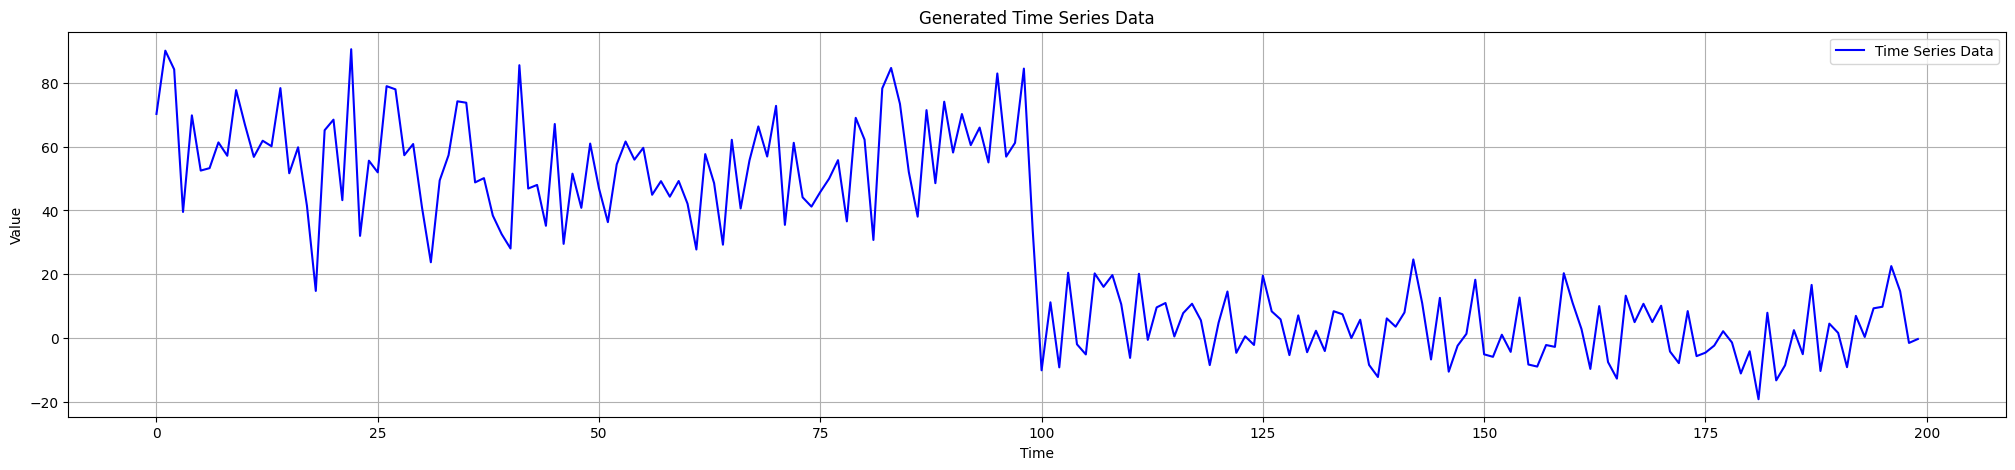

In [9]:

# Generate time series data with change points
generator = ChangePointGenerator(num_segments=2, 
                                 segment_length=100, 
                                 change_point_type='sudden_shift',
                                 seed=0)  # set seed for reproducibility
generator.generate_data()

# Plot the generated data
generator.plot_data()

# Monitoring ml-model performance on data shift

In [11]:
# Set number of lags
num_lags = 2

# Initialize model
model = RecursiveLeastSquares(num_variables=num_lags, forgetting_factor=0.99, initial_delta=0.1)

# Detect change points using CUSUM Detector
cusum_detector = CUSUM_Detector(warmup_period=10, delta=1, threshold=5)

# Retrieve observations
observations = np.array(generator.data)

# Store predictions and observed values
list_predictions = []
list_observed = []
list_residuals = []

list_pos_changes = []
list_change_points = []

# Create a figure for the animation with grid layout
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
prediction_ax, residual_ax, change_ax = axs
fig.tight_layout(pad=5.0)

# Animation function
def animate(i):
    if i >= len(observations) - num_lags - 1:
        return

    # Get the input
    X = observations[i:i + num_lags].reshape(-1, 1)

    # Make a prediction
    y_pred = model.predict(X)

    # Wait and get the true value
    print(f" After model prediction the true value is observed {i}")

    # Get the true value
    y = observations[i + num_lags + 1].reshape(-1, 1)

    # Update the model and make a prediction
    model.update(X, y)

    # Store prediction and observed values
    list_predictions.append(y_pred)
    list_observed.append(y[0])

    # Compute residuals
    residuals = np.abs(y - y_pred)
    list_residuals.append(residuals[0])

    # Detect change points
    output_detected = cusum_detector.predict_next(residuals[0])
    list_pos_changes.append(output_detected[0][0])

    # Clear the axes for new plots
    prediction_ax.clear()
    residual_ax.clear()
    change_ax.clear()

    # Plot predictions vs observed values
    prediction_ax.plot(list_observed, label='Obs', color='blue')
    prediction_ax.plot(list_predictions, label='Pred-RLS', color='orange')
    prediction_ax.legend()
    prediction_ax.set_title('Predictions vs Observed')
    
    # Plot residuals
    residual_ax.plot(list_residuals, label='Residuals', color='red')
    residual_ax.legend()
    residual_ax.set_title('Residuals')

    # Plot detected change points
    change_ax.plot(list_pos_changes, label='Performance Cumulative Changes', color='green')
    change_ax.axhline(y=cusum_detector.threshold, color='r', linestyle='--')
    change_ax.legend()
    change_ax.set_title('Detected Change Points')

# Create the animation
ani = FuncAnimation(fig, animate, frames=200, repeat=False)  #len(observations) - num_lags - 1

# Save the animation as a GIF
ani.save('monitoring.gif', writer='pillow', fps=1)

plt.close(fig)  # Prevent the figure from displaying

 After model prediction the true value is observed 0
 After model prediction the true value is observed 0
 After model prediction the true value is observed 1
 After model prediction the true value is observed 2
 After model prediction the true value is observed 3
 After model prediction the true value is observed 4
 After model prediction the true value is observed 5
 After model prediction the true value is observed 6
 After model prediction the true value is observed 7
 After model prediction the true value is observed 8
 After model prediction the true value is observed 9
 After model prediction the true value is observed 10
 After model prediction the true value is observed 11
 After model prediction the true value is observed 12
 After model prediction the true value is observed 13
 After model prediction the true value is observed 14
 After model prediction the true value is observed 15
 After model prediction the true value is observed 16
 After model prediction the true value 